In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')
## font type : otf, ttf
plt.rcParams['font.family'] = 'Gulim'

In [4]:
df = pd.read_csv('https://bit.ly/3RhoNho')

C:\Users\user\AppData\Local\Temp\ipykernel_6488\369920610.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://bit.ly/3RhoNho')


In [8]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401682 entries, 0 to 401681
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           401682 non-null  int64  
 1   도서명          401279 non-null  object 
 2   저자           401481 non-null  object 
 3   출판사          396887 non-null  object 
 4   발행년도         401665 non-null  object 
 5   ISBN         401682 non-null  object 
 6   세트 ISBN      61871 non-null   object 
 7   부가기호         325034 non-null  object 
 8   권            68267 non-null   object 
 9   주제분류번호       381360 non-null  object 
 10  도서권수         401682 non-null  int64  
 11  대출건수         401682 non-null  int64  
 12  등록일자         401682 non-null  object 
 13  Unnamed: 13  0 non-null       float64
dtypes: float64(1), int64(3), object(10)
memory usage: 42.9+ MB


,번호,도서권수,대출건수,Unnamed: 13
count,401682.000000,401682.000000,401682.000000,0.0
mean,200841.500000,1.127130,10.954300,NaN
std,115955.749751,0.498039,17.836878,NaN
min,1.000000,0.000000,0.000000,NaN
25%,100421.250000,1.000000,1.000000,NaN
50%,200841.500000,1.000000,5.000000,NaN
75%,301261.750000,1.000000,14.000000,NaN
max,401682.000000,40.000000,1468.000000,NaN


In [9]:
df = df.iloc[:,:-1]

In [10]:
df.shape

(401682, 13)

In [13]:
new_df = df.발행년도.value_counts().reset_index()

In [15]:
new_df.columns = ['발행년도','발행부수']

In [17]:
new_df.dtypes

발행년도    object
발행부수     int64
dtype: object

In [29]:
# 년도 4자리만 사용하도록 --> 4자리가 숫자가 아니거나,
# 4자리를 숫자로 변환했을겨우 1945이전거랑 2024이후 데이터는 지우기

# (int(new_df.발행년도[1][:4]) >= 1945) \
# & (int(new_df.발행년도[1][:4]) <= 2023)
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        result = int(val)
        if result < 1945 or result > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [35]:
## 이상데이터 제거
new_df.drop(remove_idx,0,inplace=True)

In [44]:
new_df.발행년도 = new_df.발행년도.astype(int)

In [48]:
tidy_df = new_df.sort_values(by='발행년도')

In [50]:
count_by_year = tidy_df.set_index('발행년도')

In [60]:
count_by_year

,발행부수
발행년도,
1947,1
1948,1
1949,1
1950,1
1952,10
...,...
2017,18433
2018,18630
2019,16926


In [68]:
for idx, val in count_by_year.items():
    print(idx,val)

발행부수 발행년도
1947        1
1948        1
1949        1
1950        1
1952       10
        ...  
2017    18433
2018    18630
2019    16926
2020    12243
2021     1299
Name: 발행부수, Length: 74, dtype: int64


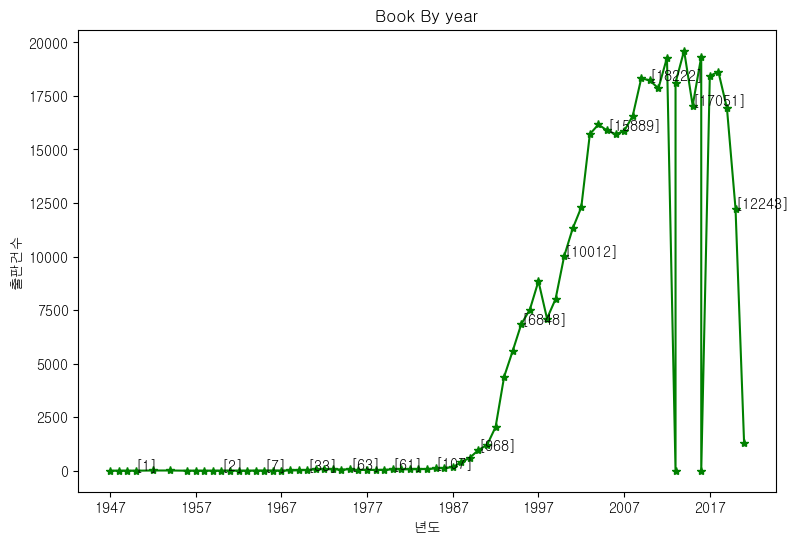

In [73]:
plt.figure(figsize=(9,6))
plt.plot(count_by_year,'*-g')
plt.title("Book By year")
plt.xlabel("년도")
plt.ylabel("출판건수")
plt.xticks(range(1947,2023,10))
for idx, val in zip(count_by_year.index, count_by_year.values):
    if idx % 5 == 0:
        plt.annotate(val,(idx,val))
plt.show()

In [74]:
df.columns

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자'],
      dtype='object')

In [83]:
new_df = df.copy()

In [85]:
new_df.주제분류번호.fillna('미분류',inplace=True)

In [86]:
new_df = new_df.주제분류번호.str[:1].value_counts().reset_index()

In [87]:
new_df.columns = ['주제분류번호','건수']

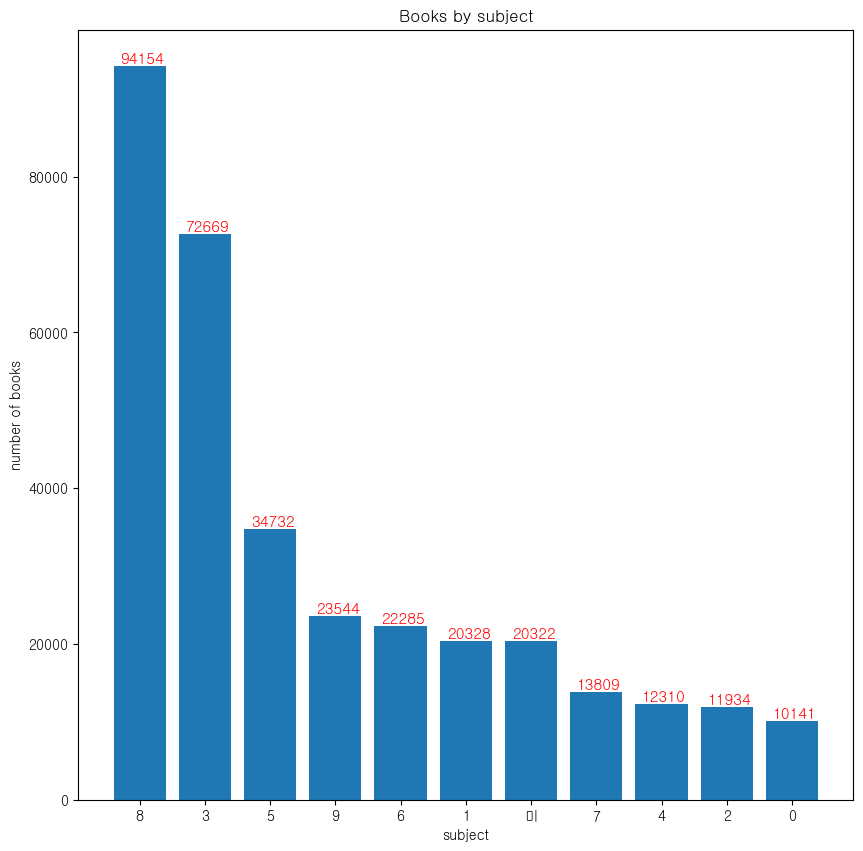

In [109]:
plt.figure(figsize=(10,10))
plt.bar(new_df.주제분류번호,new_df.건수)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(idx,val),xytext=(2,2),
                 textcoords='offset points',
                 ha='center',
                 fontsize=11,
                color='red')
plt.show()

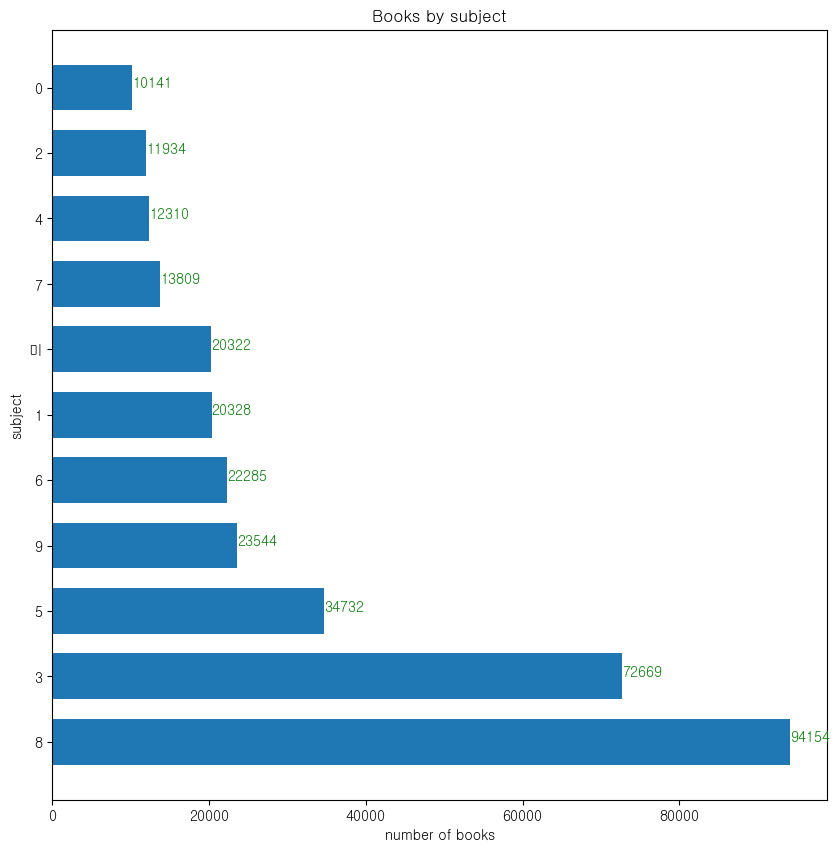

In [133]:
plt.figure(figsize=(10,10))
plt.barh(new_df.주제분류번호,new_df.건수,height=.7)
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(val,idx),color='green')
plt.savefig('book_subject.png')
plt.show()


In [113]:
a = [1,2,3]
b = ['one','two','three']

In [114]:
tmp = {}
for key,val in zip(b,a):
    tmp[key] = val
tmp

{'one': 1, 'two': 2, 'three': 3}

In [116]:
{key:val for key,val in zip(b,a) }

{'one': 1, 'two': 2, 'three': 3}

In [117]:
dict(zip(b,a))

{'one': 1, 'two': 2, 'three': 3}

In [129]:
img.shape

(1280, 1920, 3)

In [120]:
img = plt.imread('1.jpg')

In [127]:
img1 = img.copy()
img1[:,:,2] = 0

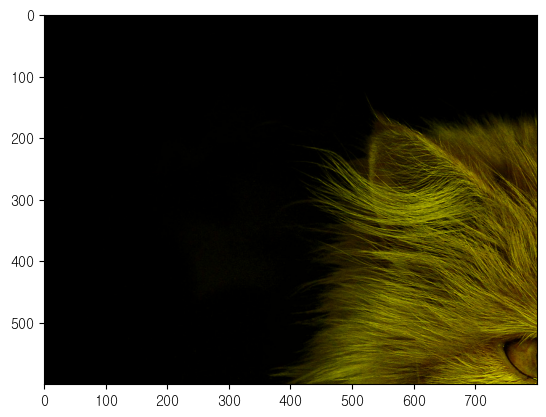

In [130]:
plt.imshow(img1[:600,:800,:])

In [135]:
book_subject = plt.imread('book_subject.png')

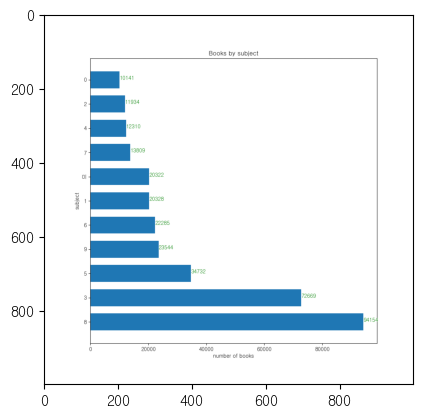

In [136]:
plt.imshow(book_subject)

In [137]:
plt.rcParams['figure.dpi'] = 100

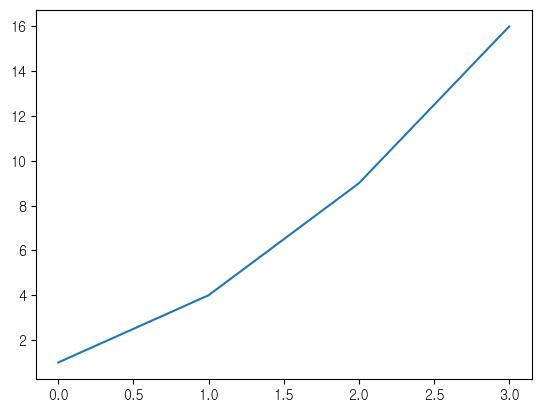

In [138]:
plt.plot(np.arange(1,5)**2)

In [ ]:
plt.plot()
plt.bar()
plt.hist()

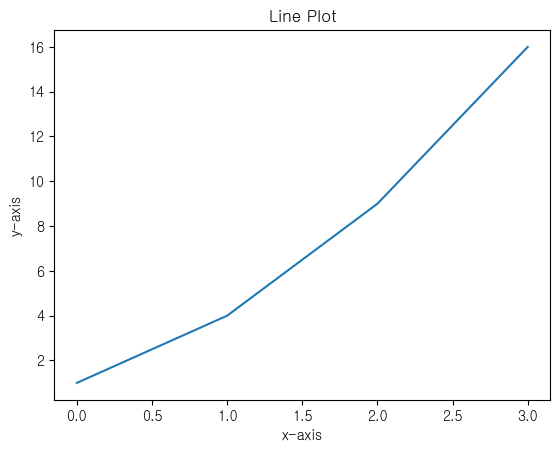

In [144]:
import matplotlib.pyplot as plt
plt.plot([1,4,9,16])
plt.title('Line Plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

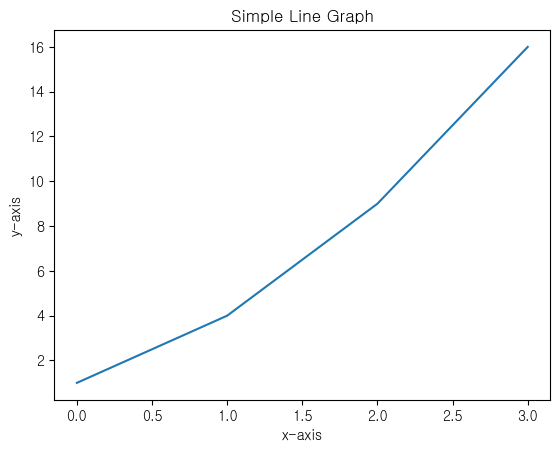

In [145]:
fig, ax = plt.subplots()
ax.plot([1,4,9,16])
ax.set_title('Simple Line Graph')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
fig.show()

In [148]:
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 11

In [149]:
## 출판사별 발행도서 산점도 그리기

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자'],
      dtype='object')

In [150]:
df[['출판사','발행년도']].value_counts()

출판사                  발행년도
웅진씽크빅                2008    495
                     2007    474
창비                   2018    442
민음사                  2014    401
웅진씽크빅                2009    387
                            ... 
대한제과협회               2004      1
                     2003      1
대한전문건설협회 실내건축공사업협의회  2005      1
대한전문건설협회             2005      1
＠nyclass(애니클래스)      2020      1
Length: 78604, dtype: int64

In [151]:
df.출판사.isna().sum()

4795

In [154]:
new_df = df.copy()

In [156]:
new_df = new_df.loc[~new_df.출판사.isna(),:]

In [160]:
new_df.columns

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자'],
      dtype='object')

In [161]:
new_df = new_df[["출판사","발행년도"]].value_counts()

In [164]:
new_df = new_df.reset_index()

In [166]:
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        if int(val) < 1945 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [167]:
new_df.drop(remove_idx,0,inplace=True)

In [169]:
new_df = df.copy()

In [175]:
new_df = new_df.loc[~new_df.출판사.isna(),:]
new_df = new_df.loc[~new_df.발행년도.isna(),:]

In [182]:
## 발행건수가 많은 상위 30개 출판사
top_30 = new_df.출판사.value_counts()[:30].index

In [183]:
top_30

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '열린책들', '한울', '살림출판사', '한길사', '한국학술정보', '博英社', '커뮤니케이션북스', '자음과모음',
       '비룡소', '지식을만드는지식', '넥서스', '랜덤하우스코리아', '황금가지', '길벗', '다산북스', '현암사',
       '책세상', '집문당', '시그마프레스', '한국문화사', '북이십일 21세기북스'],
      dtype='object')

In [185]:
new_df = new_df.loc[new_df.출판사.isin(top_30),:]

In [192]:
new_df.index = np.arange(new_df.shape[0])

In [193]:
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        if int(val) < 2000 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [195]:
new_df.drop(remove_idx,0,inplace=True)

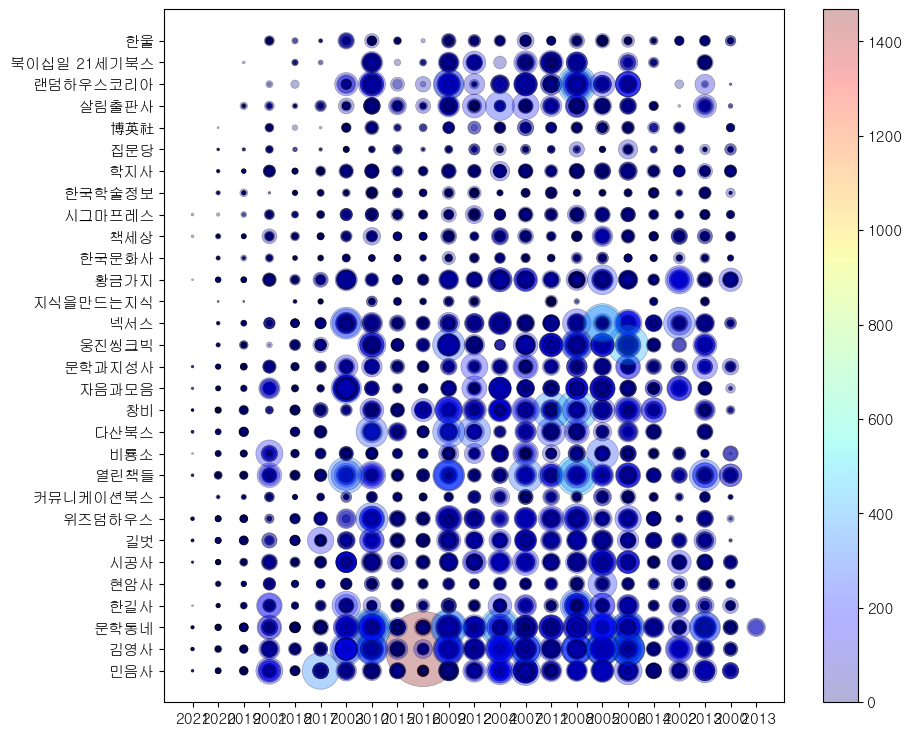

In [276]:
fig, ax = plt.subplots(figsize=(10,9))
sc = ax.scatter(new_df.발행년도, new_df.출판사, 
           s=new_df.대출건수*2,
           linewidths=0.5,
           edgecolor='k',
           c= new_df.대출건수,
           alpha=.3,
           cmap = 'jet'
          )
fig.colorbar(sc)
fig.show()

In [174]:
new_df.발행년도.isna().sum()

16

In [253]:
line1 = df.loc[df.출판사 == '황금가지',:]
line2 = df.loc[df.출판사 == '비룡소',:]

In [254]:
line1[["발행년도","대출건수"]]
line2[["발행년도","대출건수"]]

,발행년도,대출건수
223,2020,0
394,2021,0
1479,2021,1
1906,2020,0
1915,2020,0
...,...,...
397401,1995,0
397503,1995,0
398633,1994,0
400292,2018,0


In [255]:
year = np.arange(1990,2030)
year = np.array(year,dtype=str)

In [256]:
line1 = line1.loc[line1.발행년도.isin(year),:]
line2 = line2.loc[line2.발행년도.isin(year),:]

In [257]:
line1 = line1[["발행년도","대출건수"]]
line2 = line2[["발행년도","대출건수"]]

In [258]:
## 순서
line1 = line1.발행년도.value_counts().sort_index()
line2 = line2.발행년도.value_counts().sort_index()

KeyError: "None of [Int64Index([-1, -2, -3], dtype='int64')] are in the [index]"

In [259]:
target = list(set(line2.index) - set(line1.index))

In [262]:
# 채우기 작은쪽 line1
for i in target:
    line1[i] = 0
line1 = line1.sort_index()
line1

1990      0
1991      0
1994      0
1995      2
1996      8
1997     28
1998     42
1999     30
2000     38
2001     48
2002     57
2003     74
2004     64
2005     66
2006    111
2007     84
2008     78
2009     68
2010     22
2011     32
2012     41
2013     54
2014     29
2015     53
2016     42
2017     46
2018     17
2019     32
2020     30
2021      8
Name: 발행년도, dtype: int64

In [251]:
# 제거 큰쪽은 line2
line2.drop(target,0,inplace=True)

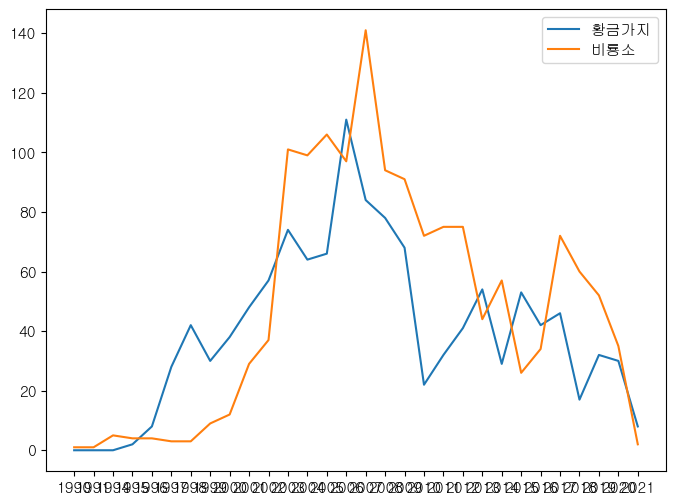

In [264]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1,label='황금가지')
ax.plot(line2,label='비룡소')
ax.legend()
fig.show()

In [303]:
target = df.출판사.value_counts()[:5].index

In [304]:
new_df = df.copy()
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        if int(val) < 1990 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)
new_df.drop(remove_idx,0,inplace=True)

# df.loc[df.출판사==target[0]]

In [307]:
new_df = new_df.loc[new_df.출판사.isin(target),:]

In [309]:
new_df = new_df.groupby(['출판사','발행년도']).sum().대출건수.reset_index()

In [314]:
year = new_df.발행년도.unique()

In [317]:
target[0]

'문학동네'

In [323]:
x = np.array([1,2,3,1,2])

In [325]:
a = np.zeros((5,3))
for i, j in enumerate(x):
    a[i,j-1] = 1

In [327]:
new_df.shape

(149, 3)

In [336]:
new_df1 = new_df.copy()

In [337]:
for i in year:
    for j in target:
        if sum((new_df1.발행년도==i) & (new_df1.출판사==j)) <1:
            tmp = pd.DataFrame(
                {
                    '출판사':[j],
                    '발행년도':[i],
                    '대출건수':[0]
                }
            )
            new_df1 = pd.concat([new_df1,tmp])
            

In [338]:
new_df1

,출판사,발행년도,대출건수
0,김영사,1990,16
1,김영사,1991,24
2,김영사,1992,27
3,김영사,1993,135
4,김영사,1994,153
...,...,...,...
0,웅진씽크빅,2021,0
0,민음사,2013,0
0,김영사,2013,0
0,웅진씽크빅,2013,0


In [341]:
new_df1

,출판사,발행년도,대출건수
0,김영사,1990,16
1,김영사,1991,24
2,김영사,1992,27
3,김영사,1993,135
4,김영사,1994,153
...,...,...,...
0,웅진씽크빅,2021,0
0,민음사,2013,0
0,김영사,2013,0
0,웅진씽크빅,2013,0


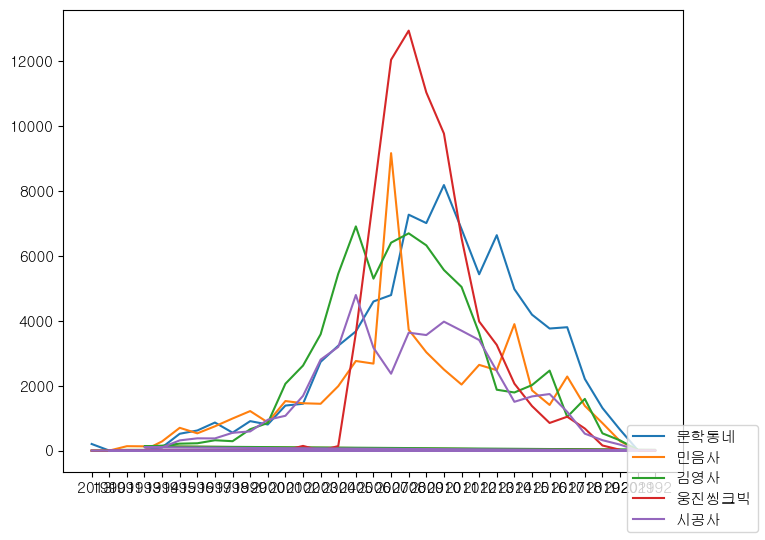

In [379]:
fig, ax = plt.subplots(figsize=(8,6))
for i in target:
    x = new_df1.loc[new_df1.출판사==i,"발행년도"]
    y = new_df1.loc[new_df1.출판사==i,"대출건수"]
    label = i
    ax.plot(x,y,label=label)
fig.legend(loc='lower right')
fig.show()

In [345]:
new_df1.pivot(index=["출판사"],columns=["발행년도"])

대출건수                                               ...              \
발행년도   2013 1990 1991 1992 1993 1994 1995 1996 1997 1998  ...  2012  2013   
출판사                                                       ...               
김영사       0   16   24   27  135  153  215  227  320  291  ...  3620  1877   
문학동네    205    2    0    0   16  102  520  621  866  554  ...  5434  6639   
민음사       0    2  137    5   12  286  703  534  750  990  ...  2643  2479   
시공사       0    1    0    6  103  101  316  379  377  550  ...  3408  2454   
웅진씽크빅     0    0    0    0    1    0    0    0    0    2  ...  3980  3258   

                                                     
발행년도   2014  2015  2016  2017  2018  2019 2020 2021  
출판사                                                  
김영사    1792  2019  2466  1040  1594   533  316   25  
문학동네   4976  4190  3763  3803  2209  1314  645   18  
민음사    3898  1859  1408  2284  1380   848  294    7  
시공사    1505  1671  1744  1196   523   322  185    5  
웅진씽크빅  2065  1374   853  1045   681   159   26    0  

[5 rows x 33 columns]

In [350]:
date = np.datetime64('2023-01-01 00') + np.arange(1000)
val = np.random.randint(1,10,1000)

In [351]:
df = pd.DataFrame(
    {
        'date':date,
        'usage':val
    }
)

In [359]:
df['day'] = df.date.astype(str).str[:10]
df['hour'] = df.date.astype(str).str[11:13]

In [360]:
df.drop(columns=['date'],inplace=True)

In [362]:
df = df[["day","hour","usage"]]

In [367]:
df.pivot(index=["hour"],columns=["day"],values=["usage"]).transpose()

hour               00   01   02   03   04   05   06   07   08   09  ...   14  \
      day                                                           ...        
usage 2023-01-01  1.0  9.0  4.0  4.0  2.0  1.0  6.0  7.0  7.0  7.0  ...  3.0   
      2023-01-02  9.0  1.0  4.0  3.0  3.0  9.0  2.0  5.0  5.0  5.0  ...  6.0   
      2023-01-03  8.0  6.0  8.0  6.0  1.0  4.0  5.0  6.0  2.0  8.0  ...  3.0   
      2023-01-04  7.0  4.0  8.0  8.0  8.0  7.0  4.0  6.0  6.0  9.0  ...  9.0   
      2023-01-05  2.0  7.0  3.0  8.0  5.0  5.0  6.0  5.0  2.0  6.0  ...  9.0   
      2023-01-06  3.0  3.0  5.0  4.0  5.0  1.0  9.0  4.0  6.0  7.0  ...  8.0   
      2023-01-07  1.0  6.0  2.0  2.0  8.0  2.0  5.0  6.0  9.0  8.0  ...  8.0   
      2023-01-08  5.0  5.0  8.0  4.0  3.0  1.0  2.0  7.0  5.0  3.0  ...  8.0   
      2023-01-09  3.0  5.0  6.0  4.0  4.0  2.0  2.0  8.0  8.0  2.0  ...  8.0   
      2023-01-10  9.0  8.0  7.0  4.0  8.0  8.0  5.0  4.0  4.0  4.0  ...  7.0   
      2023-01-11  5.0  6.0  9.0  1.0  8.0  7.0  6.0  4.0  4.0  9.0  ...  1.0   
      2023-01-12  1.0  2.0  3.0  3.0  8.0  4.0  3.0  6.0  7.0  2.0  ...  9.0   
      2023-01-13  7.0  5.0  1.0  2.0  8.0  9.0  6.0  7.0  8.0  9.0  ...  7.0   
      2023-01-14  1.0  5.0  8.0  8.0  8.0  3.0  6.0  4.0  7.0  8.0  ...  1.0   
      2023-01-15  2.0  1.0  7.0  7.0  1.0  4.0  7.0  6.0  8.0  7.0  ...  5.0   
      2023-01-16  2.0  3.0  4.0  3.0  6.0  2.0  6.0  4.0  1.0  4.0  ...  2.0   
      2023-01-17  7.0  5.0  8.0  4.0  7.0  4.0  3.0  8.0  1.0  1.0  ...  6.0   
      2023-01-18  8.0  2.0  2.0  9.0  2.0  8.0  7.0  2.0  7.0  6.0  ...  8.0   
      2023-01-19  7.0  4.0  9.0  5.0  9.0  9.0  4.0  8.0  4.0  5.0  ...  1.0   
      2023-01-20  3.0  2.0  4.0  1.0  3.0  6.0  5.0  2.0  7.0  2.0  ...  1.0   
      2023-01-21  4.0  4.0  7.0  1.0  2.0  5.0  3.0  6.0  9.0  5.0  ...  4.0   
      2023-01-22  2.0  1.0  3.0  6.0  7.0  9.0  9.0  5.0  9.0  4.0  ...  7.0   
      2023-01-23  1.0  1.0  6.0  6.0  5.0  7.0  1.0  4.0  6.0  3.0  ...  9.0   
      2023-01-24  8.0  7.0  9.0  5.0  7.0  9.0  2.0  7.0  7.0  3.0  ...  8.0   
      2023-01-25  8.0  6.0  9.0  1.0  6.0  1.0  3.0  1.0  6.0  1.0  ...  8.0   
      2023-01-26  6.0  9.0  9.0  6.0  3.0  6.0  8.0  3.0  6.0  5.0  ...  6.0   
      2023-01-27  7.0  8.0  7.0  2.0  4.0  9.0  6.0  9.0  9.0  3.0  ...  4.0   
      2023-01-28  2.0  8.0  4.0  7.0  6.0  4.0  1.0  4.0  7.0  8.0  ...  6.0   
      2023-01-29  4.0  4.0  5.0  9.0  9.0  7.0  3.0  6.0  9.0  6.0  ...  3.0   
      2023-01-30  6.0  3.0  9.0  7.0  3.0  3.0  9.0  3.0  3.0  2.0  ...  2.0   
      2023-01-31  5.0  2.0  6.0  6.0  5.0  5.0  4.0  8.0  9.0  2.0  ...  7.0   
      2023-02-01  7.0  9.0  3.0  6.0  8.0  5.0  2.0  7.0  2.0  5.0  ...  3.0   
      2023-02-02  5.0  3.0  7.0  1.0  2.0  3.0  2.0  5.0  8.0  3.0  ...  2.0   
      2023-02-03  5.0  7.0  6.0  8.0  7.0  6.0  2.0  2.0  8.0  7.0  ...  7.0   
      2023-02-04  4.0  8.0  7.0  2.0  3.0  2.0  3.0  8.0  8.0  2.0  ...  1.0   
      2023-02-05  6.0  8.0  2.0  2.0  2.0  9.0  5.0  5.0  1.0  2.0  ...  9.0   
      2023-02-06  2.0  8.0  1.0  7.0  6.0  4.0  1.0  3.0  1.0  1.0  ...  6.0   
      2023-02-07  8.0  1.0  7.0  9.0  6.0  5.0  3.0  8.0  5.0  7.0  ...  5.0   
      2023-02-08  9.0  8.0  6.0  3.0  4.0  9.0  1.0  2.0  5.0  1.0  ...  6.0   
      2023-02-09  2.0  9.0  3.0  4.0  2.0  4.0  4.0  1.0  8.0  7.0  ...  6.0   
      2023-02-10  6.0  6.0  3.0  2.0  6.0  9.0  5.0  1.0  1.0  4.0  ...  4.0   
      2023-02-11  5.0  8.0  5.0  1.0  9.0  2.0  9.0  6.0  8.0  6.0  ...  5.0   

hour               15   16   17   18   19   20   21   22   23  
      day                                                      
usage 2023-01-01  8.0  6.0  4.0  2.0  2.0  1.0  3.0  1.0  2.0  
      2023-01-02  9.0  8.0  5.0  8.0  9.0  6.0  7.0  8.0  6.0  
      2023-01-03  9.0  3.0  2.0  5.0  9.0  1.0  2.0  8.0  8.0  
      2023-01-04  5.0  1.0  5.0  8.0  3.0  2.0  2.0  4.0  5.0  
      2023-01-05  5.0  1.0  2.0  3.0  4.0  5.0  9.0  8.0  5.0  
      2023-01-06  1.0  7.0  2.0

In [373]:
label = new_df1.groupby(['출판사']).sum().index

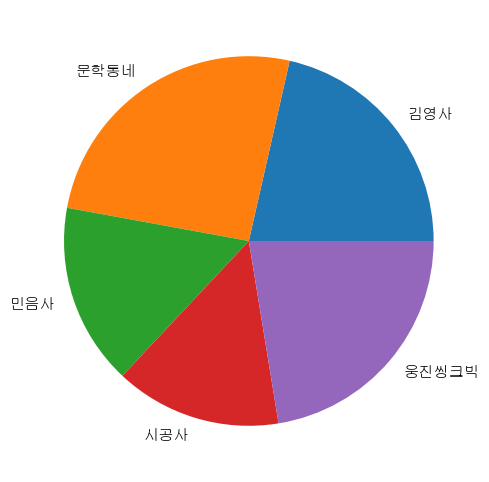

In [376]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(new_df1.groupby(['출판사']).sum().대출건수,labels=label)
fig.show()

In [5]:
import numpy as np
x = np.array([0,3,5,7])

In [381]:
(x - x.mean())/x.std()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [382]:
from sklearn.preprocessing import StandardScaler

In [387]:
StandardScaler().fit_transform(x.reshape(-1,1)).ravel()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [385]:
x.reshape(1,-1)

array([[0, 3, 5, 7]])

In [1]:
from scipy import stats

In [6]:
stats.zscore(x)

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [11]:
x = np.random.uniform(0,1,10000)

In [9]:
import matplotlib.pyplot as plt

In [13]:
from scipy import stats

In [15]:
x = stats.chi(1000)

In [24]:
x_chi = np.random.chisquare(3, size=10000)
x_uni = np.random.uniform(0,1,size=10000)

(array([  1.,   6.,   2.,   9.,  19.,  27.,  47.,  75., 120., 161., 196.,
        251., 304., 432., 494., 548., 581., 586., 605., 625., 617., 583.,
        535., 521., 438., 425., 348., 338., 237., 206., 159., 109.,  99.,
         91.,  53.,  36.,  44.,  20.,  19.,  16.,   4.,   3.,   3.,   1.,
          0.,   4.,   0.,   1.,   0.,   1.]),
 array([1.58117047, 1.65239205, 1.72361364, 1.79483522, 1.86605681,
        1.93727839, 2.00849998, 2.07972156, 2.15094315, 2.22216473,
        2.29338632, 2.3646079 , 2.43582948, 2.50705107, 2.57827265,
        2.64949424, 2.72071582, 2.79193741, 2.86315899, 2.93438058,
        3.00560216, 3.07682375, 3.14804533, 3.21926692, 3.2904885 ,
        3.36171009, 3.43293167, 3.50415325, 3.57537484, 3.64659642,
        3.71781801, 3.78903959, 3.86026118, 3.93148276, 4.00270435,
        4.07392593, 4.14514752, 4.2163691 , 4.28759069, 4.35881227,
        4.43003386, 4.50125544, 4.57247702, 4.64369861, 4.71492019,
        4.78614178, 4.85736336, 4.92858495, 4.

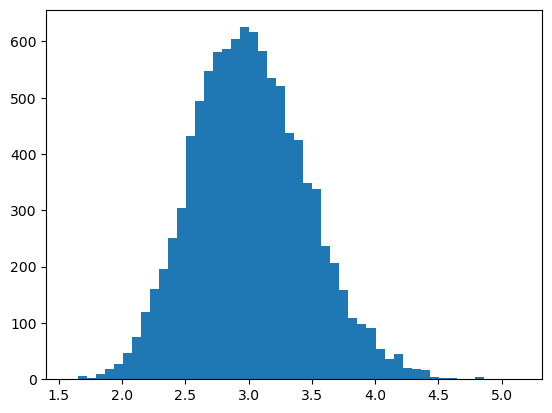

In [28]:
x_chi_sample = []
for _ in range(10000):
    result = np.random.choice(x_chi,30).mean()
    x_chi_sample.append(result)
plt.hist(x_chi_sample,bins=50)

(array([  2.,   0.,   0.,   0.,   1.,   1.,   2.,   2.,   2.,   4.,   3.,
          7.,   5.,   8.,  12.,  15.,  10.,  30.,  13.,  25.,  27.,  19.,
         42.,  40.,  45.,  57.,  80.,  80.,  85.,  94., 100., 121., 122.,
        157., 132., 173., 193., 212., 201., 240., 266., 264., 258., 259.,
        266., 249., 297., 319., 275., 326., 314., 314., 272., 244., 289.,
        242., 271., 251., 230., 211., 217., 206., 212., 182., 169., 152.,
        144., 128., 106.,  95.,  89.,  72.,  50.,  55.,  58.,  41.,  34.,
         38.,  30.,  31.,  23.,  20.,  10.,  10.,   8.,  12.,   4.,   6.,
          2.,   4.,   2.,   4.,   1.,   0.,   3.,   0.,   1.,   1.,   0.,
          1.]),
 array([0.29949567, 0.30352026, 0.30754486, 0.31156945, 0.31559405,
        0.31961864, 0.32364323, 0.32766783, 0.33169242, 0.33571702,
        0.33974161, 0.34376621, 0.3477908 , 0.3518154 , 0.35583999,
        0.35986458, 0.36388918, 0.36791377, 0.37193837, 0.37596296,
        0.37998756, 0.38401215, 0.38803675, 0.

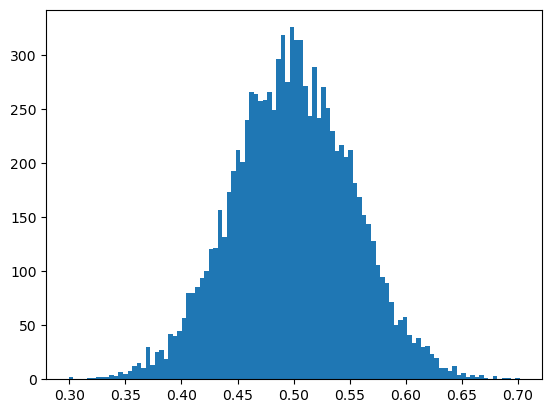

In [30]:
#plt.hist(x_uni)
x_uni_sample = []
for _ in range(10000):
    result = np.random.choice(x_uni,30).mean()
    x_uni_sample.append(result)
plt.hist(x_uni_sample,bins=100)

In [31]:
from scipy import stats

In [44]:
male = np.random.randint(50,100,1000)
female = np.random.randint(60,100,1000)

In [45]:
male.mean(), female.mean()

(74.035, 79.824)

In [46]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-9.806072754817208, pvalue=3.329888495187428e-22)

In [47]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
import pandas as pd

In [50]:
iris_df = pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])

In [51]:
iris_df['Species'] = load_iris()['target']

In [54]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [56]:
lm = LogisticRegression()

In [57]:
lm.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
lm.score(X_test,y_test)

0.9736842105263158

In [62]:
X_train.shape

(112, 4)

In [72]:
lm.predict(X_test.iloc[[19],:])

array([1])

In [73]:
y_test.iloc[19]

1